In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./data/titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./data/titanic/test.csv
./data/titanic/train.csv
./data/titanic/gender_submission.csv


In [2]:
train = pd.read_csv("./data/titanic/train.csv")
X_test = pd.read_csv("./data/titanic/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.shape

(891, 12)

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train[train.Embarked.isnull() == False]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
#First, we delete 2 rows, because probably they didnt embarque
train = train[train.Embarked.isnull() == False]
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [10]:
class ColumnDropperTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self
    
    def set_output(self, transform=None):
        """Ensures compatibility with Scikit-Learn 1.2+"""
        return self

def preprocessCabin(X):
    return X.Cabin.fillna("Unknown").astype(str).str[0].to_frame()

def sex_to_binary(sex_column):
    return sex_column.map({'male': 1, 'female': 0}).to_frame()

In [11]:
#Preparing preprocessing 

X = train.drop(columns=["Survived"], axis=1)
y = train.Survived

X_train, X_valid, y_train, y_valid = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 42, 
                                        shuffle      = True
                                    )

#Columns that don´t apport any significant value
columnsToDrop = ["PassengerId","Name","Ticket","Fare","Embarked","Pclass"]

dropper = ColumnDropperTransformer(columns=columnsToDrop)
dropper_cabin = ColumnDropperTransformer(columns=["onehot_cabin__Cabin_U"])

cabin_pipeline = Pipeline([
    ("cabin_transformer", FunctionTransformer(preprocessCabin, feature_names_out="one-to-one")),
    ("encoder",ColumnTransformer([('onehot_cabin', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop=None),["Cabin"])],remainder = 'passthrough')),
    ('drop_columns_cabin', dropper_cabin),
])

preprocessor = ColumnTransformer(
                   [("simple_imputter_age",SimpleImputer(strategy="mean"),["Age"]), #Mean of Age
                    ("cabin",cabin_pipeline,["Cabin"]), #"Process Cabin",
                    ('sex_encoder', FunctionTransformer(sex_to_binary, validate=False), 'Sex'),
                    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop=None), ["Pclass"]),
                    ('drop_columns', dropper, columnsToDrop)
                   ],remainder = 'passthrough',verbose_feature_names_out = False).set_output(transform="pandas")

X_train_prep = preprocessor.fit_transform(X_train)
X_valid_prep = preprocessor.transform(X_valid)






In [12]:
X_train_prep.head()

,Age,onehot_cabin__Cabin_A,onehot_cabin__Cabin_B,onehot_cabin__Cabin_C,onehot_cabin__Cabin_D,onehot_cabin__Cabin_E,onehot_cabin__Cabin_F,onehot_cabin__Cabin_G,onehot_cabin__Cabin_T,Sex,Pclass_1,Pclass_2,Pclass_3,SibSp,Parch
708,22.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0,0
240,29.905745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,1,0
382,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0,0
792,29.905745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,8,2
683,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,5,2


In [13]:
X_valid_prep.head()

,Age,onehot_cabin__Cabin_A,onehot_cabin__Cabin_B,onehot_cabin__Cabin_C,onehot_cabin__Cabin_D,onehot_cabin__Cabin_E,onehot_cabin__Cabin_F,onehot_cabin__Cabin_G,onehot_cabin__Cabin_T,Sex,Pclass_1,Pclass_2,Pclass_3,SibSp,Parch
281,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0,0
435,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,1,2
39,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,1,0
418,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0,0
585,18.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0,2


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

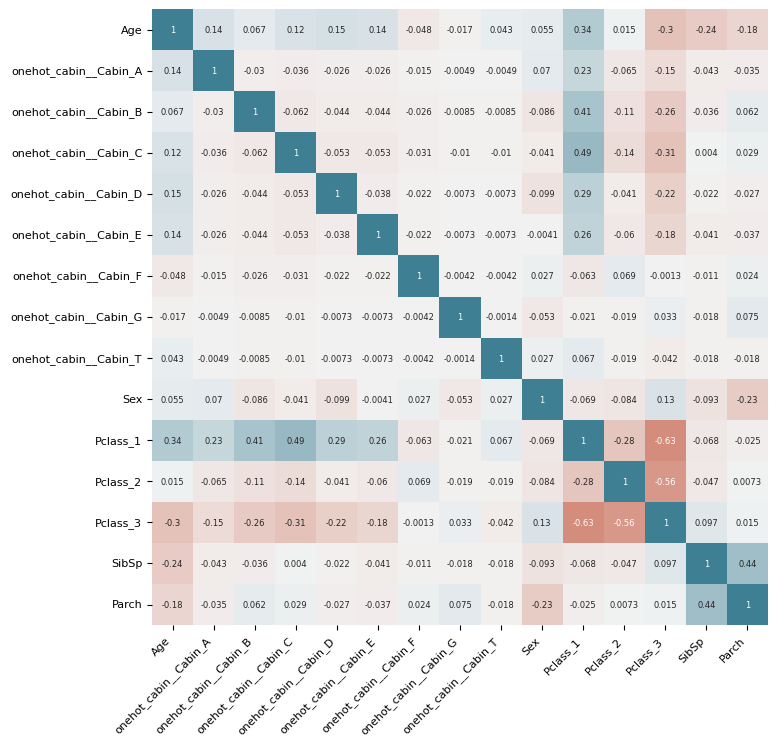

In [15]:
corr_matrix = X_train_prep.select_dtypes(include=['float64', 'int']).corr(method='pearson')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RF = RandomForestClassifier()

In [17]:
forrest_params = dict(     
    max_depth = [n for n in range(9, 14)],     
    min_samples_split = [n for n in range(4, 11)], 
    min_samples_leaf = [n for n in range(2, 5)],     
    n_estimators = [n for n in range(10, 60, 100)],
)

forest_cv = GridSearchCV(estimator=RF,param_grid=forrest_params, cv=5) 
forest_cv.fit(X_train_prep, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [9, 10, 11, 12, 13],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10]})

In [18]:
print("Best score: {}".format(forest_cv.best_score_))
print("Optimal params: {}".format(forest_cv.best_estimator_))

Best score: 0.8269969467152565
Optimal params: RandomForestClassifier(max_depth=13, min_samples_leaf=2, min_samples_split=6,
                       n_estimators=10)


In [19]:
optimal_RF = RandomForestClassifier(max_depth=12, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=10)
optimal_RF.fit(X_train_prep, y_train)
score_train = optimal_RF.score(X_train_prep, y_train)
score_valid = optimal_RF.score(X_valid_prep, y_valid)
print("Acierto en el conjunto de entrenamiento: {0:.2f}%".format(score_train*100.))
print("Acierto en el conjunto de test: {0:.2f}%".format(score_valid*100.))

Acierto en el conjunto de entrenamiento: 86.50%
Acierto en el conjunto de test: 81.46%


In [20]:
X_test_prep = preprocessor.transform(X_test)
test_predictions = optimal_RF.predict(X_test_prep)

In [21]:
finish = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': test_predictions})
# save to csv
finish.to_csv('submission.csv', index=False)